# CARGA Y VISUALIZACIÓN DE DATOS

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("/content/sample_data/Steel_industry_data.csv")

In [ ]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [ ]:
df.shape

(35040, 11)

# EDA

## ANÁLISIS GENERAL Y LIMPIEZA INICIAL

In [ ]:
print(df['Load_Type'].unique())

['Light_Load' 'Medium_Load' 'Maximum_Load']


In [ ]:
# Visualizamos los valores que contiene el dataframe
df.nunique()

,0
date,35040
Usage_kWh,3343
Lagging_Current_Reactive.Power_kVarh,1954
Leading_Current_Reactive_Power_kVarh,768
CO2(tCO2),8
Lagging_Current_Power_Factor,5079
Leading_Current_Power_Factor,3366
NSM,96
WeekStatus,2
Day_of_week,7


In [ ]:
# La descripción de la data menciona que no hay valores nulos, pero lo verificamos de todas formas
df.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


In [ ]:
# Verificar filas duplicadas en el conjunto completo
duplicated_rows = df.duplicated()
num_duplicated = duplicated_rows.sum()
print(f"Número de filas duplicadas: {num_duplicated}")

# Mostrar algunas filas duplicadas si existen
if num_duplicated > 0:
    print(df[duplicated_rows].head())
else:
    print("No se encontraron filas duplicadas.")


Número de filas duplicadas: 0
No se encontraron filas duplicadas.


In [ ]:
# NOTA: LA FECHA HACE QUE NO HAYAN COINCIDENCIAS CON DUPLICADOS, SIN CONTAR LA FECHA, HAY 81 VALORES DUPLICADOS

In [ ]:
# Eliminar filas completamente duplicadas (mantener la primera aparición)
df = df.drop_duplicates()

# Verificar que se eliminaron correctamente
print(f"Nueva forma del DataFrame: {df.shape}")


Nueva forma del DataFrame: (35040, 11)


## Análisis Univariado

Análisis Univariado - Variables Numéricas

📌 Estadísticas descriptivas:


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


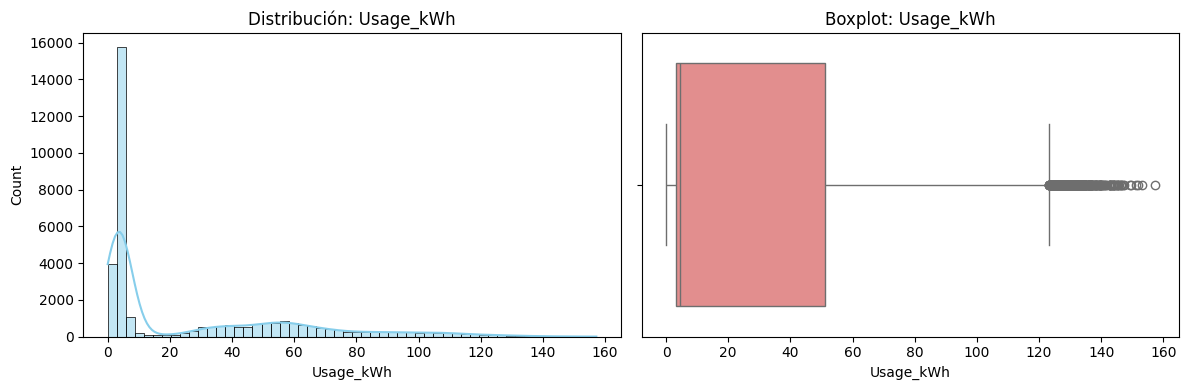

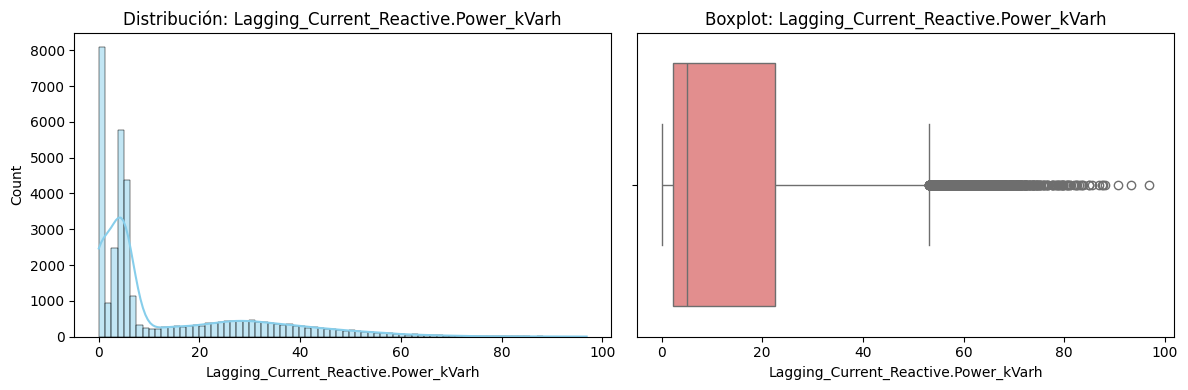

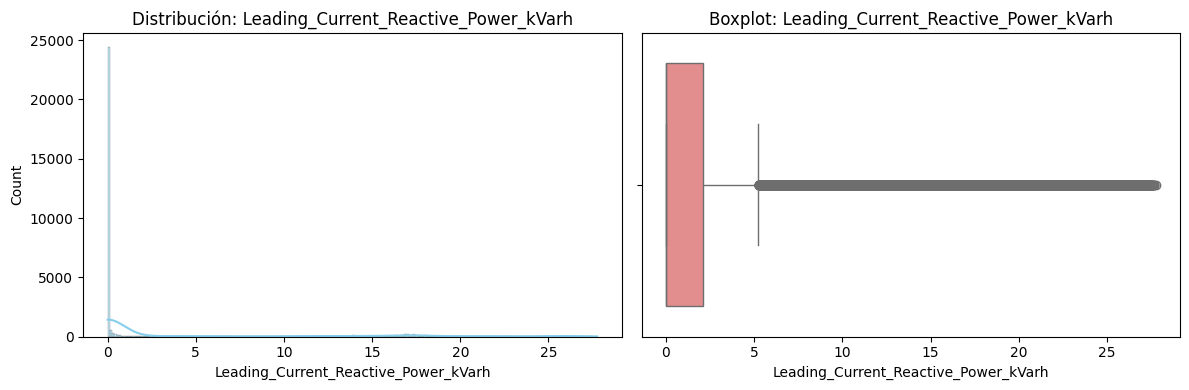

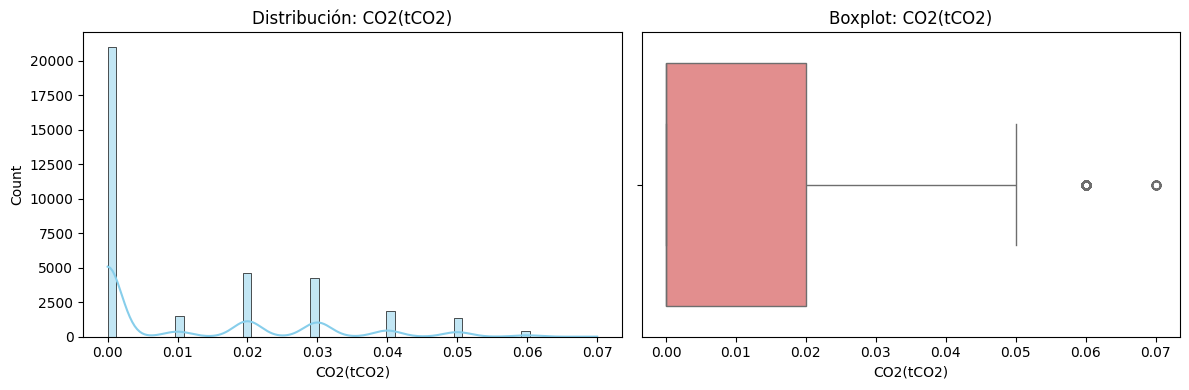

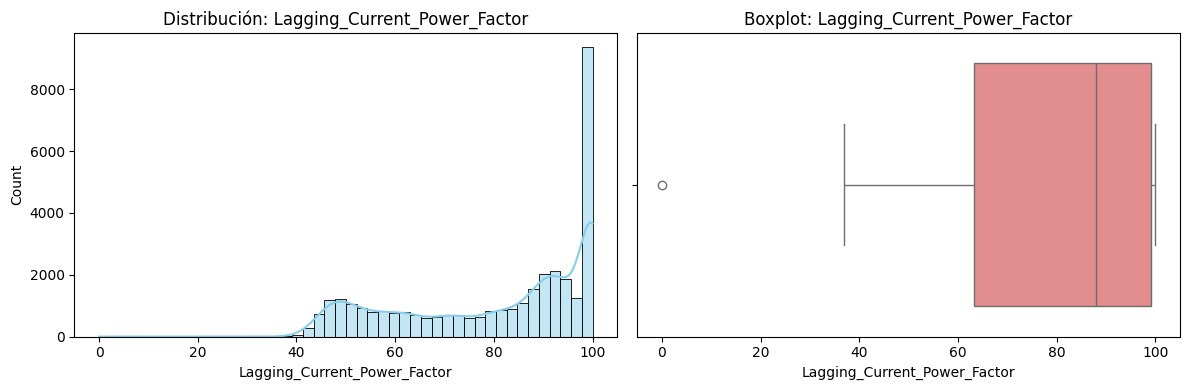

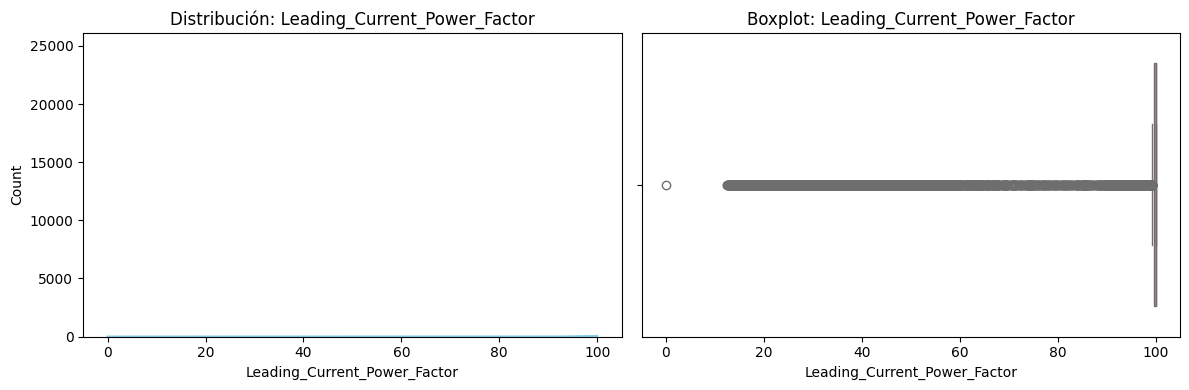

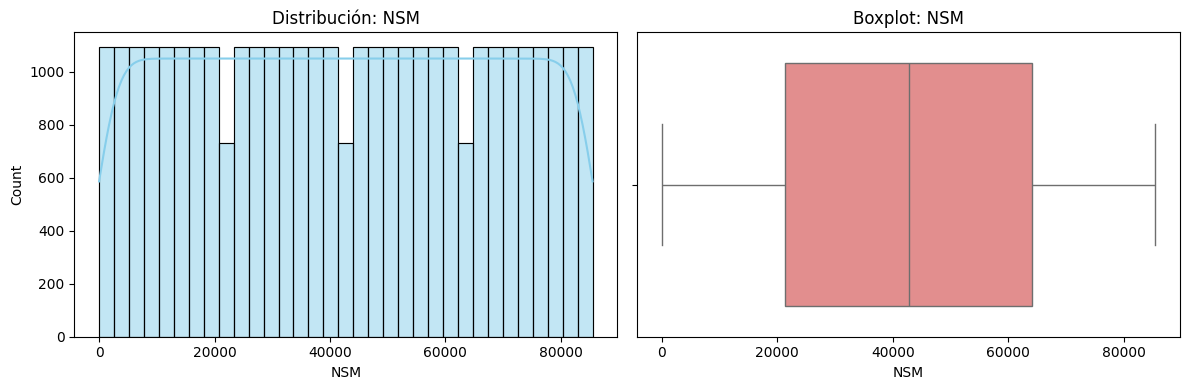

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separar columnas numéricas
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Estadísticas descriptivas
print("📌 Estadísticas descriptivas:")
display(df[numerical_cols].describe())

# Histogramas y Boxplots
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribución: {col}')

    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot: {col}')

    plt.tight_layout()
    plt.show()


Análisis Univariado - Variables Categóricas

📌 Conteo de categorías para: WeekStatus
WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64


/tmp/ipython-input-47-1274042523.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


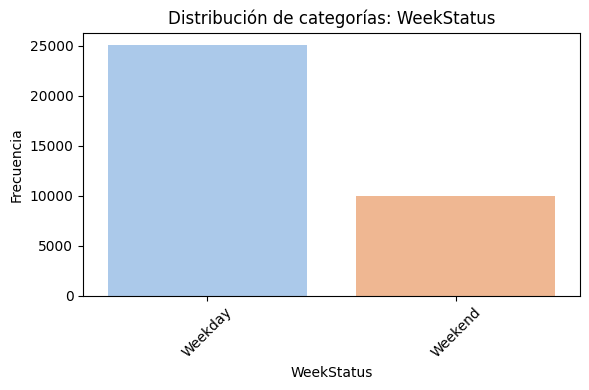

📌 Conteo de categorías para: Day_of_week
Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64


/tmp/ipython-input-47-1274042523.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


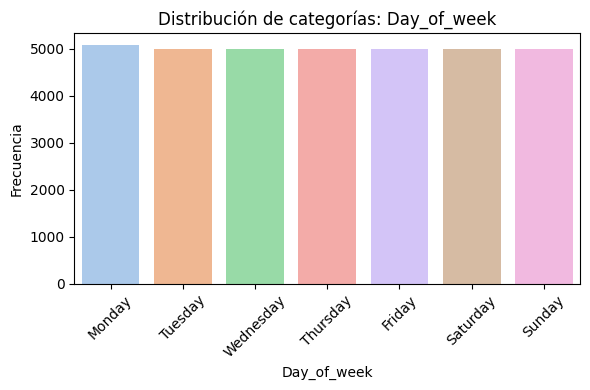

📌 Conteo de categorías para: Load_Type
Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64


/tmp/ipython-input-47-1274042523.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


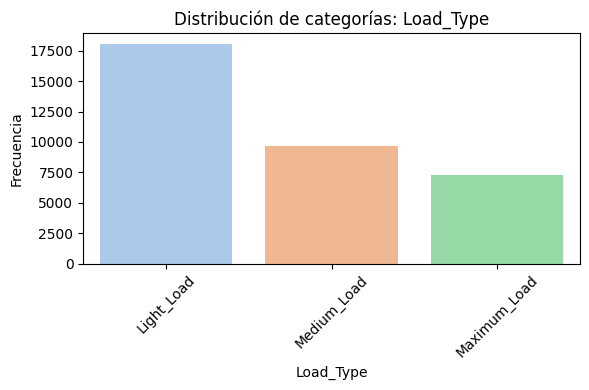

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas categóricas, excluyendo 'date'
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop('date')

# Conteo de categorías y gráficas de barras
for col in categorical_cols:
    print(f"📌 Conteo de categorías para: {col}")
    print(df[col].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Distribución de categorías: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



## ANÁLISIS TEMPORAL

In [ ]:
# Asegurarse que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Extraer variables temporales
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.weekday  # lunes=0, domingo=6
df['is_weekend'] = df['weekday'].isin([5, 6])  # sábado o domingo

# Clasificar hora en períodos del día
def get_time_period(hour):
    if 0 <= hour < 6:
        return 'Madrugada'
    elif 6 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['time_period'] = df['hour'].apply(get_time_period)

# Verificar nuevas columnas creadas
print(df[['date', 'hour', 'day', 'month', 'year', 'weekday', 'is_weekend', 'time_period']].head())


                 date  hour  day  month  year  weekday  is_weekend time_period
0 2018-01-01 00:15:00     0    1      1  2018        0       False   Madrugada
1 2018-01-01 00:30:00     0    1      1  2018        0       False   Madrugada
2 2018-01-01 00:45:00     0    1      1  2018        0       False   Madrugada
3 2018-01-01 01:00:00     1    1      1  2018        0       False   Madrugada
4 2018-01-01 01:15:00     1    1      1  2018        0       False   Madrugada


/tmp/ipython-input-49-1372181820.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='Usage_kWh', estimator='mean', ci=None)


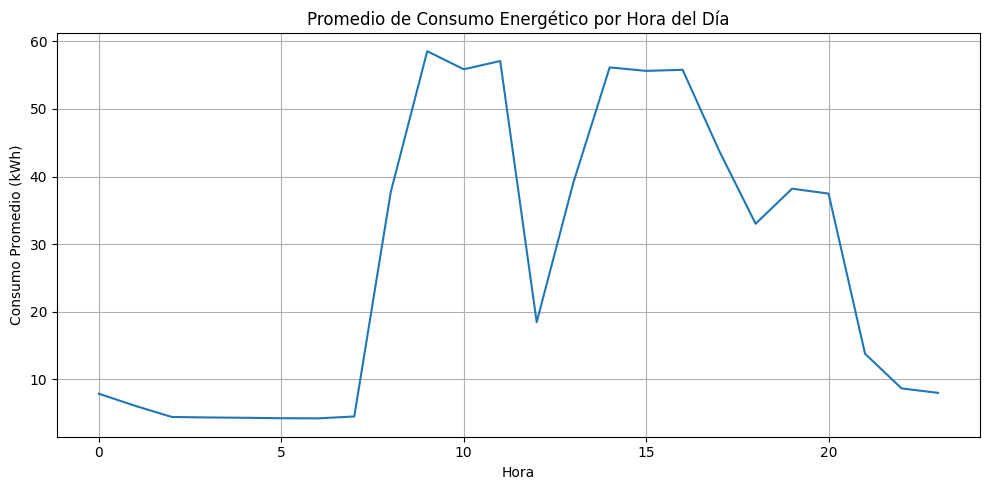

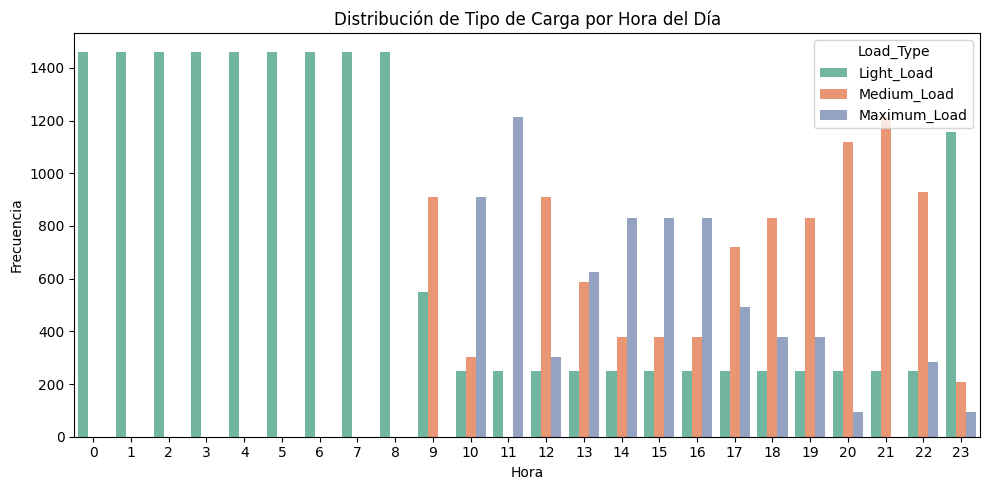

/tmp/ipython-input-49-1372181820.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='day', y='Usage_kWh', estimator='mean', ci=None)


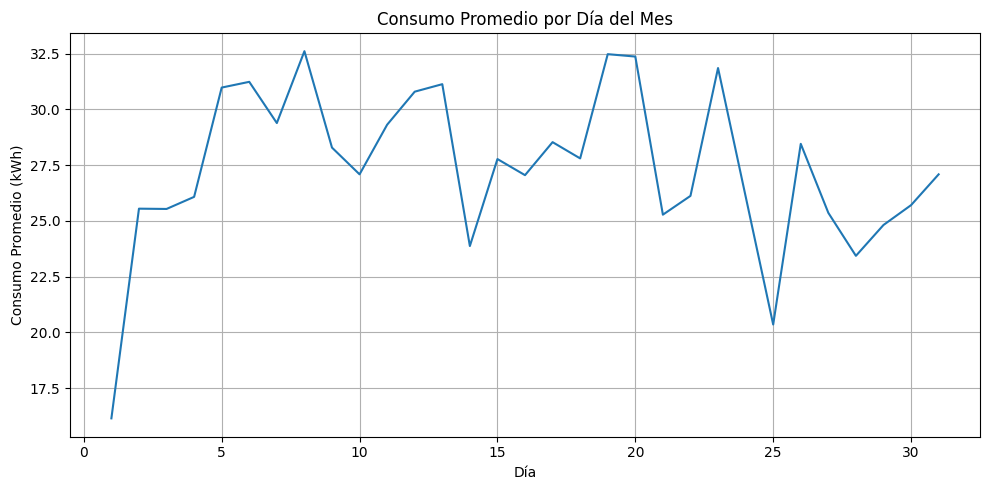

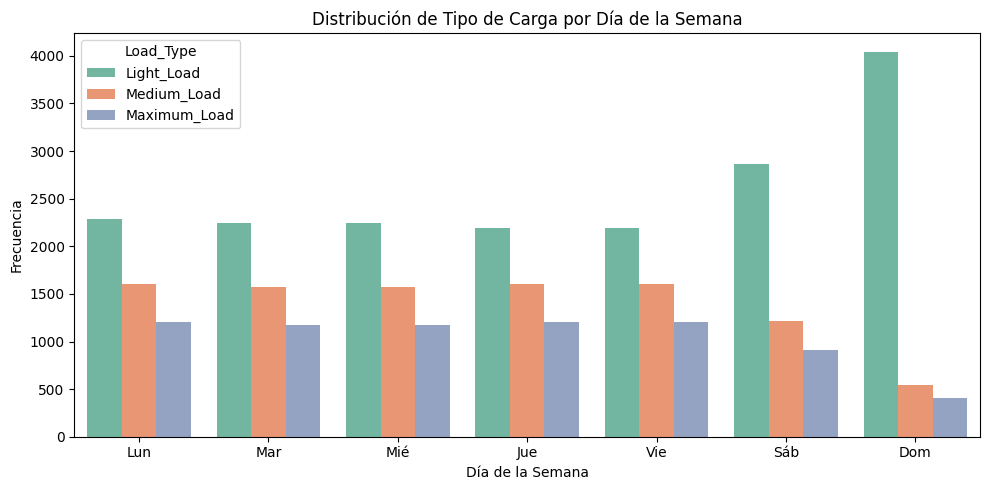

/tmp/ipython-input-49-1372181820.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_weekend', y='Usage_kWh', palette='coolwarm')


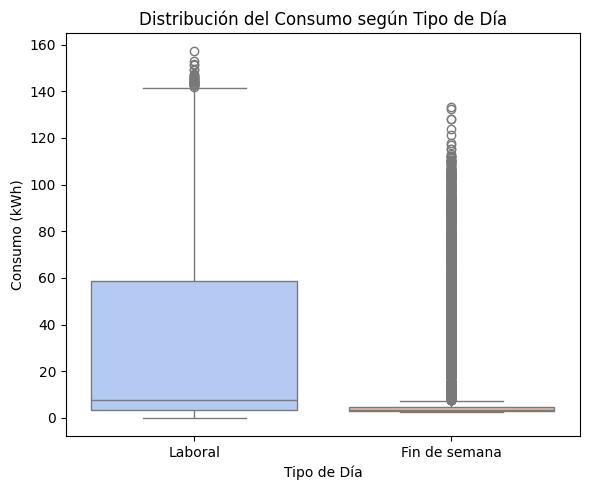

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# A. Promedio de consumo por hora del día
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='hour', y='Usage_kWh', estimator='mean', ci=None)
plt.title('Promedio de Consumo Energético por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Consumo Promedio (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# B. Distribución de tipo de carga por hora del día
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hour', hue='Load_Type', palette='Set2')
plt.title('Distribución de Tipo de Carga por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.legend(title='Load_Type')
plt.tight_layout()
plt.show()

# C. Consumo promedio por día del mes
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='day', y='Usage_kWh', estimator='mean', ci=None)
plt.title('Consumo Promedio por Día del Mes')
plt.xlabel('Día')
plt.ylabel('Consumo Promedio (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# D. Frecuencia de tipo de carga por día de la semana
plt.figure(figsize=(10, 5))
dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
sns.countplot(data=df, x='weekday', hue='Load_Type', palette='Set2')
plt.xticks(ticks=range(7), labels=dias)
plt.title('Distribución de Tipo de Carga por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.legend(title='Load_Type')
plt.tight_layout()
plt.show()

# E. Comparación de consumo entre fin de semana y días laborables
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='is_weekend', y='Usage_kWh', palette='coolwarm')
plt.xticks([0, 1], ['Laboral', 'Fin de semana'])
plt.title('Distribución del Consumo según Tipo de Día')
plt.xlabel('Tipo de Día')
plt.ylabel('Consumo (kWh)')
plt.tight_layout()
plt.show()


## Matriz de correlación

/tmp/ipython-input-51-1912465272.py:15: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


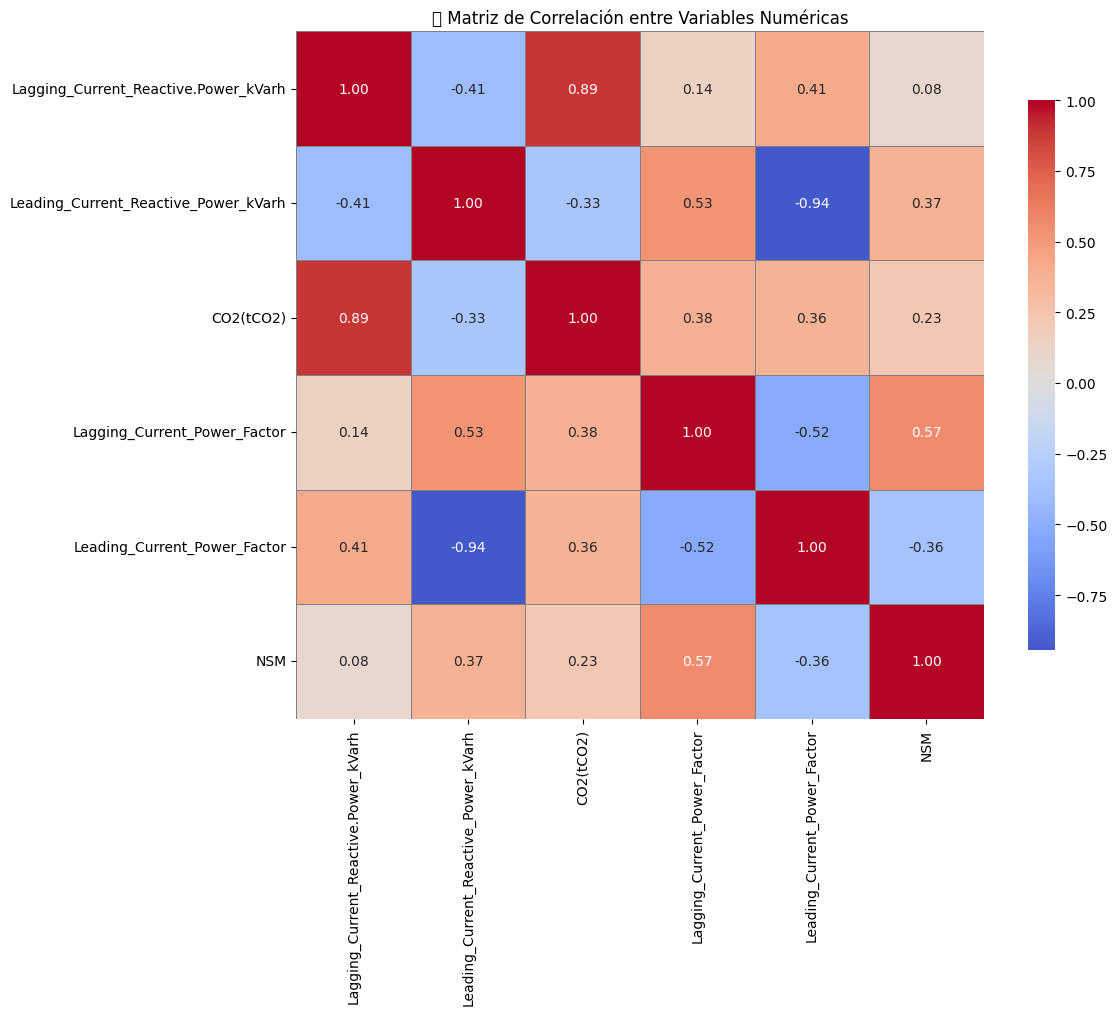

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dfCorrelation = df.drop(columns=["Usage_kWh"], axis=1)
# Seleccionar columnas numéricas
numerical_cols = dfCorrelation.select_dtypes(include=['int64', 'float64']).columns

# Matriz de correlación (Pearson por defecto)
correlation_matrix = dfCorrelation[numerical_cols].corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True,
            linewidths=0.5, linecolor='gray', cbar_kws={'shrink': 0.8})
plt.title('🔗 Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
#ELIMINAMOS COLUMNAS CON ALTA CORRELACIÓN BASADO EN UN TRESHOLD

# Umbral de alta correlación
threshold = 0.85

# Calcular la matriz de correlación absoluta
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr().abs()

# Crear máscara para eliminar duplicados de la matriz (triángulo superior)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar columnas con correlación mayor al umbral
columns_to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Eliminar esas columnas del DataFrame
df_reduced = df.drop(columns=columns_to_drop)

# Mostrar columnas eliminadas y forma final
print(f"Columnas eliminadas por alta correlación: {columns_to_drop}")
print(f"Forma del DataFrame reducido: {df_reduced.shape}")


Columnas eliminadas por alta correlación: ['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)', 'Leading_Current_Power_Factor']
Forma del DataFrame reducido: (35040, 15)


In [ ]:
# One-hot encoding para variables categóricas no ordinales
df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'time_period'], drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Load_Type_encoded'] = le.fit_transform(df['Load_Type'])  # Para análisis supervisado

In [ ]:
df = df.drop(columns=['date', 'Load_Type', 'NSM'])

In [ ]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'hour',
       'day', 'month', 'year', 'weekday', 'is_weekend', 'WeekStatus_Weekend',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'time_period_Mañana', 'time_period_Noche', 'time_period_Tarde',
       'Load_Type_encoded'],
      dtype='object')

In [ ]:
df = df.drop(columns=['year'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df.shape

(35040, 22)

In [ ]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,hour,day,month,weekday,...,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,time_period_Mañana,time_period_Noche,time_period_Tarde,Load_Type_encoded
0,3.17,2.95,0.00,0.0,73.21,100.00,0,1,1,0,...,True,False,False,False,False,False,False,False,False,0
1,4.00,4.46,0.00,0.0,66.77,100.00,0,1,1,0,...,True,False,False,False,False,False,False,False,False,0
2,3.24,3.28,0.00,0.0,70.28,100.00,0,1,1,0,...,True,False,False,False,False,False,False,False,False,0
3,3.31,3.56,0.00,0.0,68.09,100.00,1,1,1,0,...,True,False,False,False,False,False,False,False,False,0
4,3.82,4.50,0.00,0.0,64.72,100.00,1,1,1,0,...,True,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,23,31,12,0,...,True,False,False,False,False,False,False,True,False,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,23,31,12,0,...,True,False,False,False,False,False,False,True,False,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,23,31,12,0,...,True,False,False,False,False,False,False,True,False,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,23,31,12,0,...,True,False,False,False,False,False,False,True,False,0


## División del dataset

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np


# ---Separar features y target ---
X = df.drop(columns=['Usage_kWh'])
y = df['Usage_kWh']

# ---División en train, validation y test ---
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# ---Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Optimización de los modelos por GridSearch

In [ ]:
#Optimizando modelos para la fase de evaluación, mediante GridSearchCV
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print(f"✅ Mejor RF: {rf_grid.best_params_}")
print(f"📉 Mejor RMSE CV: {-rf_grid.best_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Mejor RF: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
📉 Mejor RMSE CV: 1.2411


In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid=xgb_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train_scaled, y_train)

print(f"✅ Mejor XGB: {xgb_grid.best_params_}")
print(f"📉 Mejor RMSE CV: {-xgb_grid.best_score_:.4f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Mejor XGB: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
📉 Mejor RMSE CV: 1.3236


In [ ]:
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_grid = GridSearchCV(
    Ridge(),
    param_grid=ridge_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

ridge_grid.fit(X_train_scaled, y_train)

print(f"✅ Mejor Ridge: {ridge_grid.best_params_}")
print(f"📉 Mejor RMSE CV: {-ridge_grid.best_score_:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Mejor Ridge: {'alpha': 0.01}
📉 Mejor RMSE CV: 4.8101


## Entrenamiento

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

# --- Obteniendo puntaje de Cross-validation (RMSE) para evaluar el desempeño del modelo para generalizar---
# A. Random Forest con los hiper-parámetros optimos
rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
rf_cv_rmse = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"🔁 RF - Cross-Validation RMSE: {rf_cv_rmse.mean():.4f} ± {rf_cv_rmse.std():.4f}")

# B. XGBoost con los hiper-parámetros óptimos
xgb_model = XGBRegressor(learning_rate= 0.1, max_depth=6, n_estimators=200, subsample=0.8, random_state=42)
xgb_cv_rmse = -cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"🔁 XGB - Cross-Validation RMSE: {xgb_cv_rmse.mean():.4f} ± {xgb_cv_rmse.std():.4f}")

# C. Ridge Regression con los hiper-parámetros óptimos
ridge_model = Ridge(alpha=0.01)
ridge_cv_rmse = -cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"🔁 Ridge - Cross-Validation RMSE: {ridge_cv_rmse.mean():.4f} ± {ridge_cv_rmse.std():.4f}")

# D. Red neuronal con valor de hiperparámetros óptimos
mlp_model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_cv_rmse = -cross_val_score(mlp_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"🔁 MLP - Cross-Validation RMSE: {mlp_cv_rmse.mean():.4f} ± {mlp_cv_rmse.std():.4f}")

# --- 5. Entrenamiento y predicciones ---

# Random Forest
rf_model.fit(X_train, y_train)
rf_val_preds = rf_model.predict(X_val)
rf_test_preds = rf_model.predict(X_test)

# XGBoost
xgb_model.fit(X_train_scaled, y_train)
xgb_val_preds = xgb_model.predict(X_val_scaled)
xgb_test_preds = xgb_model.predict(X_test_scaled)

# Ridge Regression
ridge_model.fit(X_train_scaled, y_train)
ridge_val_preds = ridge_model.predict(X_val_scaled)
ridge_test_preds = ridge_model.predict(X_test_scaled)

# Red Neuronal (MLP)
mlp_model.fit(X_train_scaled, y_train)
mlp_val_preds = mlp_model.predict(X_val_scaled)
mlp_test_preds = mlp_model.predict(X_test_scaled)

# --- 6. Evaluación ---
def evaluar_modelo(nombre, y_val, val_preds, y_test, test_preds):
    print(f"\n📌 {nombre} - Validación:")
    print("MAE:", mean_absolute_error(y_val, val_preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_val, val_preds)))
    print("R²:", r2_score(y_val, val_preds))

    print(f"\n📌 {nombre} - Test:")
    print("MAE:", mean_absolute_error(y_test, test_preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, test_preds)))
    print("R²:", r2_score(y_test, test_preds))

# Evaluar todos
evaluar_modelo("Random Forest", y_val, rf_val_preds, y_test, rf_test_preds)
evaluar_modelo("XGBoost", y_val, xgb_val_preds, y_test, xgb_test_preds)
evaluar_modelo("Ridge Regression", y_val, ridge_val_preds, y_test, ridge_test_preds)
evaluar_modelo("Red Neuronal (MLP)", y_val, mlp_val_preds, y_test, mlp_test_preds)


🔁 RF - Cross-Validation RMSE: 1.2411 ± 0.0883
🔁 XGB - Cross-Validation RMSE: 1.3236 ± 0.0582
🔁 Ridge - Cross-Validation RMSE: 4.8101 ± 0.1703
🔁 MLP - Cross-Validation RMSE: 0.9286 ± 0.0885

📌 Random Forest - Validación:
MAE: 0.3822056266045639
RMSE: 1.151359134207835
R²: 0.9987990963532732

📌 Random Forest - Test:
MAE: 0.4005557651917346
RMSE: 1.1341460592012158
R²: 0.9988684243804958

📌 XGBoost - Validación:
MAE: 0.528761475516956
RMSE: 1.1034660754628485
R²: 0.9988969263408769

📌 XGBoost - Test:
MAE: 0.540711187967971
RMSE: 1.1915978754777405
R²: 0.9987508774573837

📌 Ridge Regression - Validación:
MAE: 2.611055638452283
RMSE: 4.478629723539484
R²: 0.9818290824296401

📌 Ridge Regression - Test:
MAE: 2.612788220298118
RMSE: 4.225284266993624
R²: 0.9842942937398094

📌 Red Neuronal (MLP) - Validación:
MAE: 0.4480983731858866
RMSE: 0.9148678745495664
R²: 0.9992417659253899

📌 Red Neuronal (MLP) - Test:
MAE: 0.45235457998986206
RMSE: 0.9025771649791678
R²: 0.9992833381454282


A pesar de que la red neuronal presentó métricas ligeramente superiores en términos de MAE y RMSE, se optó por el modelo Random Forest debido a su mayor interpretabilidad y facilidad de ajuste. El modelo XGBoost se descartó al momento de realizar la validación cruzada, por tener un RMSE de 1.3236 mayor que el de Random Forest 1.24.
En general, Random Forest obtuvo un MAE menor tanto en validación como en prueba, lo que indica un menor error promedio absoluto por predicción. Además,  un valor bajo de RMSE de la validación cruzada.

## Análisis de resultados

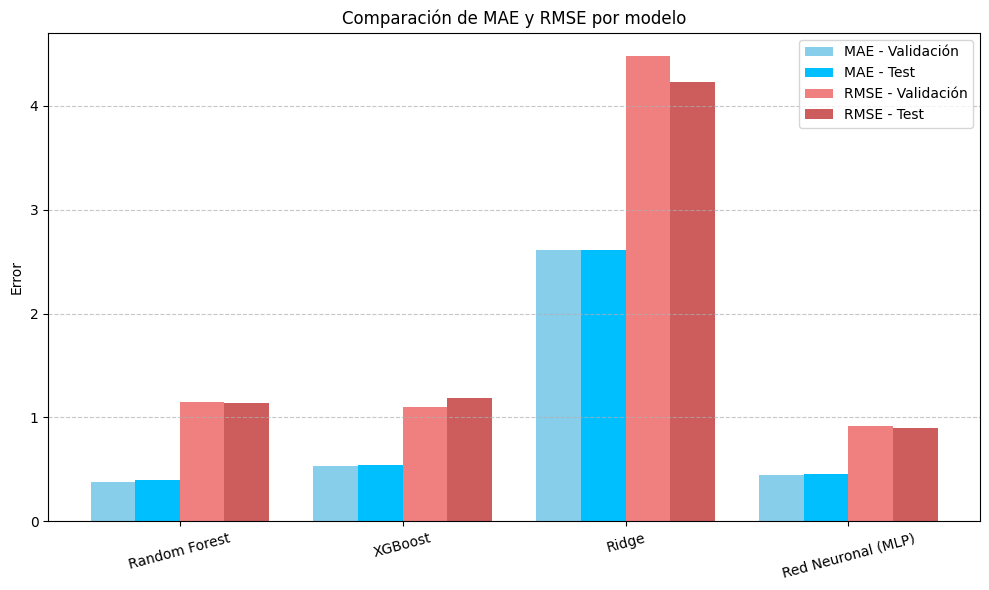

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

modelos = ['Random Forest', 'XGBoost', 'Ridge', 'Red Neuronal (MLP)']

mae_val = [0.3822, 0.5288, 2.6111, 0.4481]
rmse_val = [1.1514, 1.1035, 4.4786, 0.9149]

mae_test = [0.4006, 0.5407, 2.6128, 0.4524]
rmse_test = [1.1341, 1.1916, 4.2253, 0.9026]

x = np.arange(len(modelos))
width = 0.2

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráficas de barras
ax.bar(x - 1.5*width, mae_val, width, label='MAE - Validación', color='skyblue')
ax.bar(x - 0.5*width, mae_test, width, label='MAE - Test', color='deepskyblue')
ax.bar(x + 0.5*width, rmse_val, width, label='RMSE - Validación', color='lightcoral')
ax.bar(x + 1.5*width, rmse_test, width, label='RMSE - Test', color='indianred')

# Etiquetas y formato
ax.set_ylabel('Error')
ax.set_title('Comparación de MAE y RMSE por modelo')
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/tmp/ipython-input-29-2062697610.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(top_n), x='Importance', y='Feature', palette='viridis')


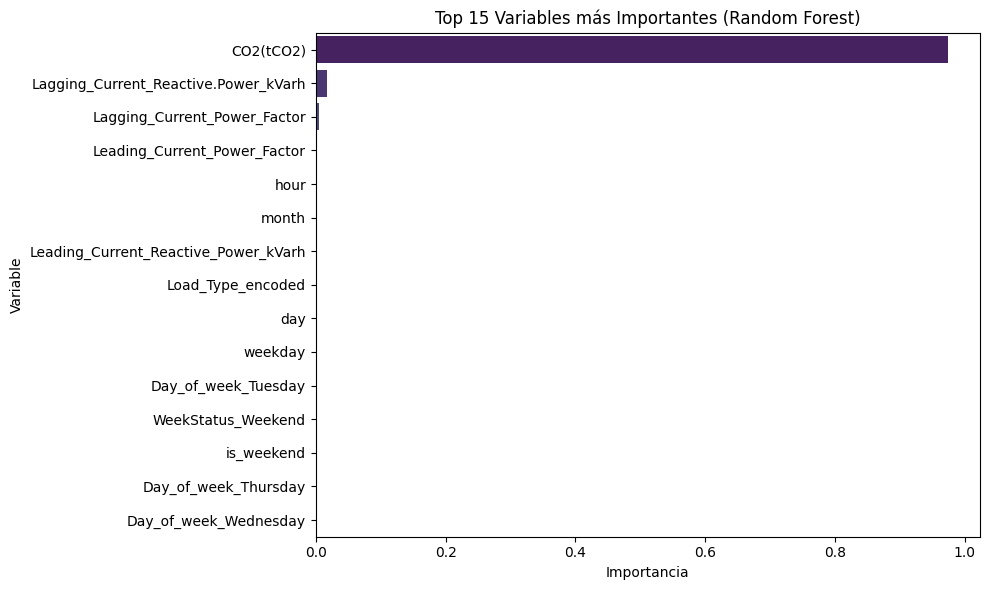

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Obtener importancias
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Crear DataFrame ordenado
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar top N
top_n = 15
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(top_n), x='Importance', y='Feature', palette='viridis')
plt.title(f'Top {top_n} Variables más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


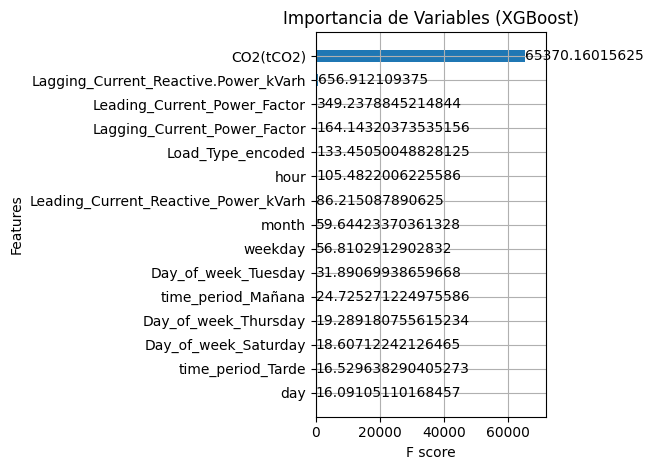

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Asigna los nombres reales de las columnas al booster del modelo
xgb_model.get_booster().feature_names = list(X_train.columns)

# Graficar la importancia con nombres reales
plot_importance(xgb_model, max_num_features=15, importance_type='gain', height=0.5)
plt.title('Importancia de Variables (XGBoost)')
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt

def graficar_pred_vs_real(y_real, y_pred, modelo_nombre='Modelo'):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_real, y_pred, alpha=0.3, edgecolor='k')
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predicho')
    plt.title(f'{modelo_nombre}: Predicción vs Valor Real')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
def graficar_residuos(y_real, y_pred, modelo_nombre='Modelo'):
    errores = y_pred - y_real
    plt.figure(figsize=(8, 4))
    plt.scatter(y_pred, errores, alpha=0.3, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Valor Predicho')
    plt.ylabel('Residuo (Predicho - Real)')
    plt.title(f'{modelo_nombre}: Residuos')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


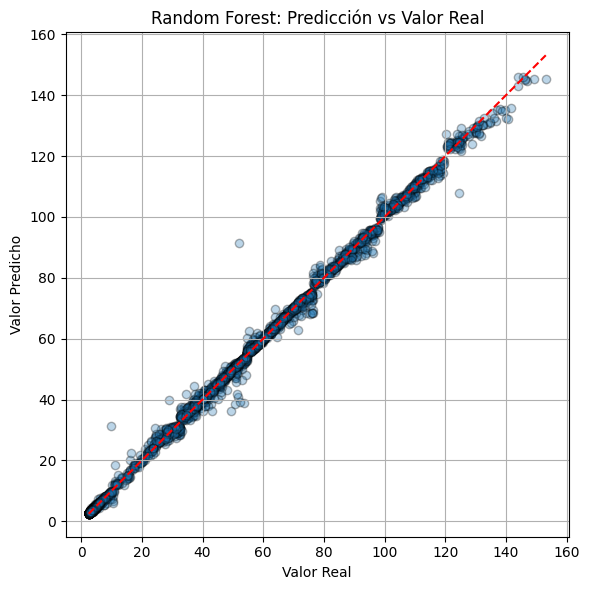

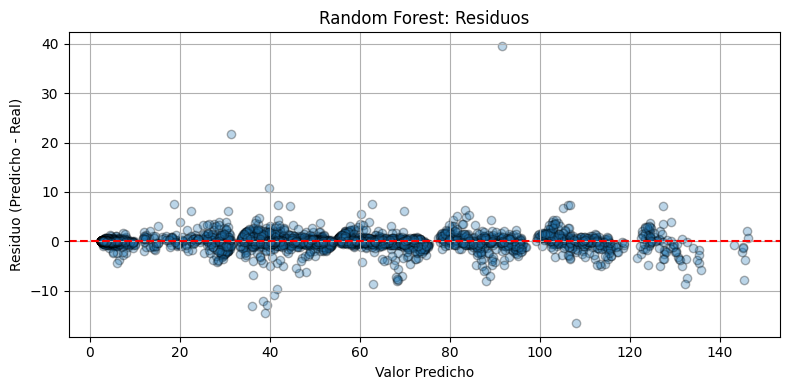

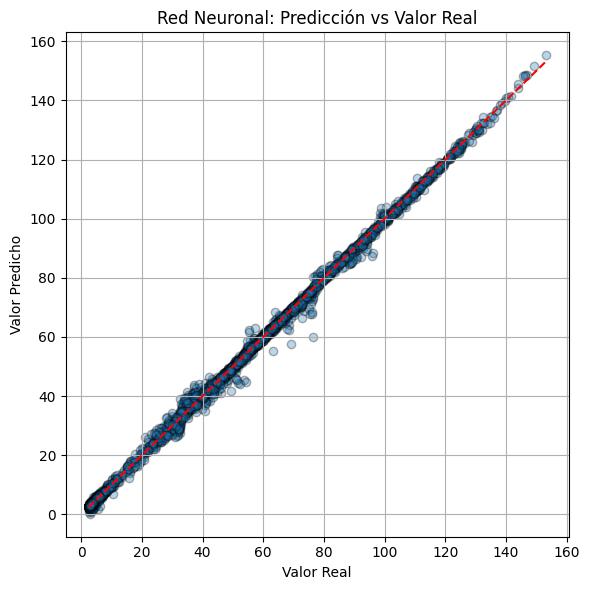

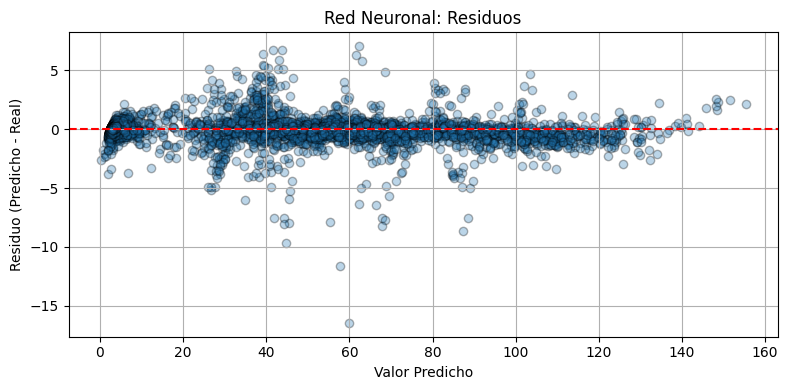

In [ ]:
graficar_pred_vs_real(y_test, rf_test_preds, modelo_nombre='Random Forest')
graficar_residuos(y_test, rf_test_preds, modelo_nombre='Random Forest')

graficar_pred_vs_real(y_test, mlp_test_preds, modelo_nombre='Red Neuronal')
graficar_residuos(y_test, mlp_test_preds, modelo_nombre='Red Neuronal')


In [ ]:
def resumen_estadistico(columna, nombre='Variable'):
    print(f"📊 Estadísticos de '{nombre}':")
    print(f"🔹 Mínimo   : {columna.min():.4f}")
    print(f"🔹 Máximo   : {columna.max():.4f}")
    print(f"🔹 Promedio : {columna.mean():.4f}")


In [ ]:
resumen_estadistico(df['Usage_kWh'], nombre='Usage_kWh')


📊 Estadísticos de 'Usage_kWh':
🔹 Mínimo   : 0.0000
🔹 Máximo   : 157.1800
🔹 Promedio : 27.3869
